In [35]:
import tradingeconomics as te
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
te.login();

In [37]:
# Get the data
symbols=['EURUSD:CUR','BTCUSD:CUR', 'XAUUSD:CUR','INDU:IND']
dates = ['2021-01-01','2021-12-31']
data = te.fetchMarkets(symbol=symbols, initDate=dates[0], endDate=dates[1], output_type='df')
data.tail()

,symbol,open,high,low,close
2021-01-04,INDU:IND,30627.47,30674.28,29881.820,30223.89
2021-01-03,BTCUSD:CUR,32216.51,34800.00,31977.450,33097.83
2021-01-02,BTCUSD:CUR,29410.77,33333.00,29050.000,32216.53
2021-01-01,BTCUSD:CUR,28999.63,29700.00,28720.000,29402.64
2021-01-01,XAUUSD:CUR,1897.31,1898.44,1896.752,1898.10


In [38]:
# Transpose symbols into columns
df = pd.DataFrame()
for s in symbols:
    dx = data.loc[data['symbol'] == s][['close']]
    dx = dx.rename(columns={'close': s})
    dx.index.name = 'Date'
    if df.empty: df = dx
    else: df = pd.merge(df, dx, on='Date')      
df.sort_values(by='Date', inplace=True, ascending=True)
df.tail()


,EURUSD:CUR,BTCUSD:CUR,XAUUSD:CUR,INDU:IND
Date,,,,
2021-06-23,1.19267,33652.28000,1778.73047,33874.24000
2021-06-24,1.19293,34649.32000,1775.18274,34196.82000
2021-06-25,1.19351,31597.75000,1780.34000,34433.84000
2021-06-28,1.19261,34487.11000,1778.17500,34283.27000
2021-06-29,1.18922,36365.66016,1757.68005,34363.55859


<AxesSubplot:xlabel='Date', ylabel='EURUSD:CUR'>

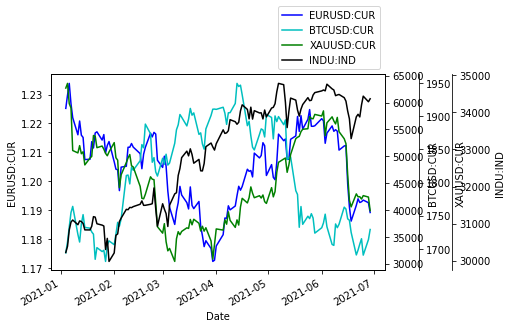

In [41]:
from helper import plot_multi
plot_multi(df)

In [43]:
# Correlation Matrix
corr = df.corr() 
corr.style.background_gradient() 

,EURUSD:CUR,BTCUSD:CUR,XAUUSD:CUR,INDU:IND
EURUSD:CUR,1.000000,-0.500501,0.853528,-0.119757
BTCUSD:CUR,-0.500501,1.000000,-0.693481,0.232094
XAUUSD:CUR,0.853528,-0.693481,1.000000,0.006563
INDU:IND,-0.119757,0.232094,0.006563,1.000000
